# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob #allows us to list out all the files in a directory

#for working with audio data
import librosa
import librosa.display
import IPython.display as ipd

# Reading Audio Files

In [4]:
audio_files = glob('../input/ravdess-emotional-speech-audio/*/*.wav')

In [6]:
# Play audio file
ipd.Audio(audio_files[0])

In [7]:
y, sr = librosa.load(audio_files[0])

In [10]:
print(f'y: {y[:10]}')
print(f'Shape of y: {y.shape}')

y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Shape of y: (77988,)


In [11]:
print(f'sr: {sr}')

sr: 22050


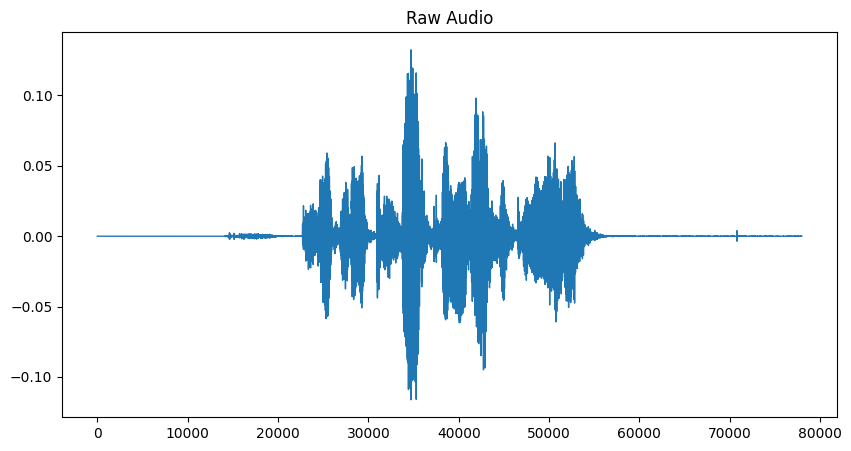

In [24]:
pd.Series(y).plot(figsize = (10,5), 
                  lw= 1, 
                  title = "Raw Audio")
plt.show()

In [22]:
y_trimmed, _ = librosa.effects.trim(y, top_db = 20)

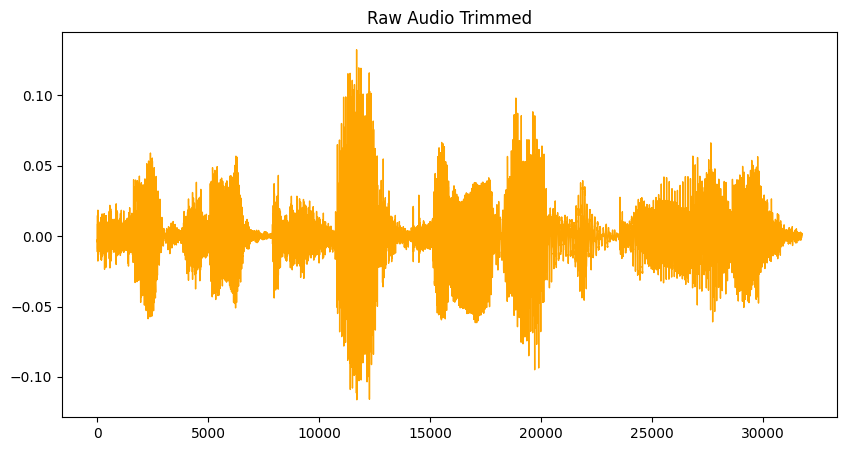

In [23]:
pd.Series(y_trimmed).plot(figsize = (10,5), 
                  lw= 1, 
                  title = "Raw Audio Trimmed",
                         color = "orange")
plt.show()

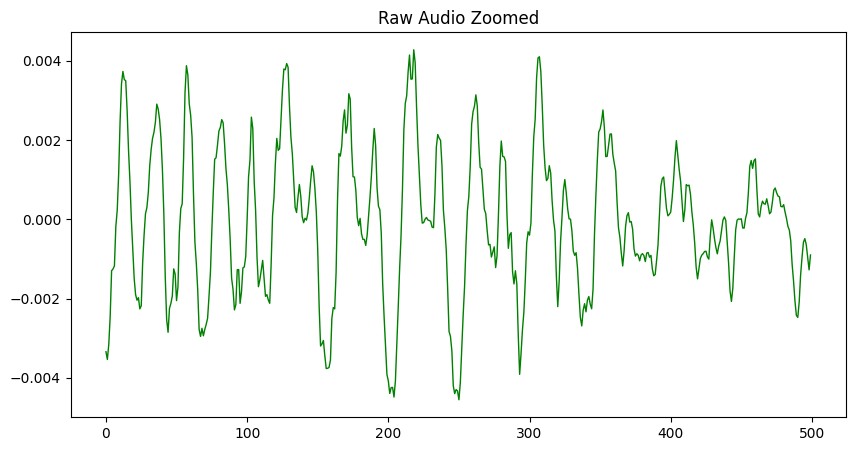

In [26]:
pd.Series(y[30000:30500]).plot(figsize = (10,5), 
                  lw= 1, 
                  title = "Raw Audio Zoomed",
                 color = "green")
plt.show()

# Spectogram

In [30]:
Decibal = librosa.stft(y)
Sound_in_Decibal = librosa.amplitude_to_db(np.abs(Decibal), ref = np.max)

In [31]:
Sound_in_Decibal.shape

(1025, 153)

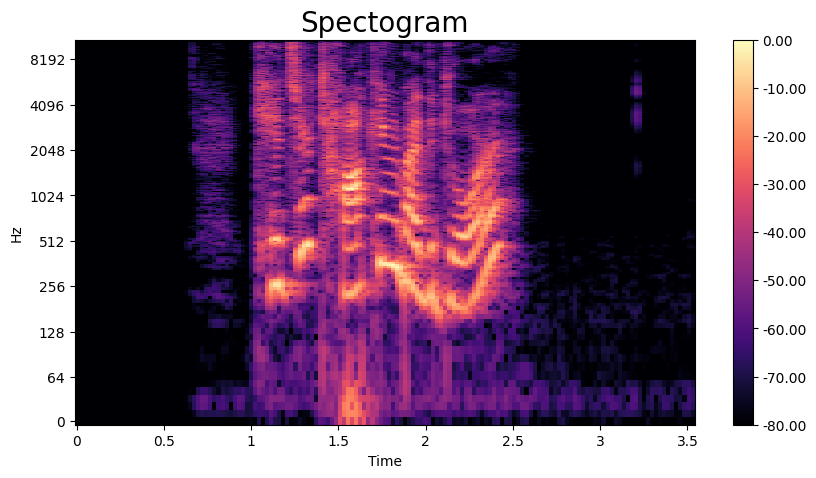

In [36]:
#plot transformed audio data

fig, ax = plt.subplots(figsize = (10,5))
img = librosa.display.specshow(Sound_in_Decibal,
                              x_axis = "time",
                              y_axis = "log",
                              ax = ax)
ax.set_title("Spectogram", fontsize = 20)
fig.colorbar(img, ax=ax, format = f'%0.2f')
plt.show()

# MelSpectogram

In [44]:
S = librosa.feature.melspectrogram(y = y,
                             sr = sr,
                            n_mels = 128 * 2)
S.shape

(256, 153)

In [45]:
Sound_in_Decibal_mel = librosa.amplitude_to_db(S, ref = np.max)

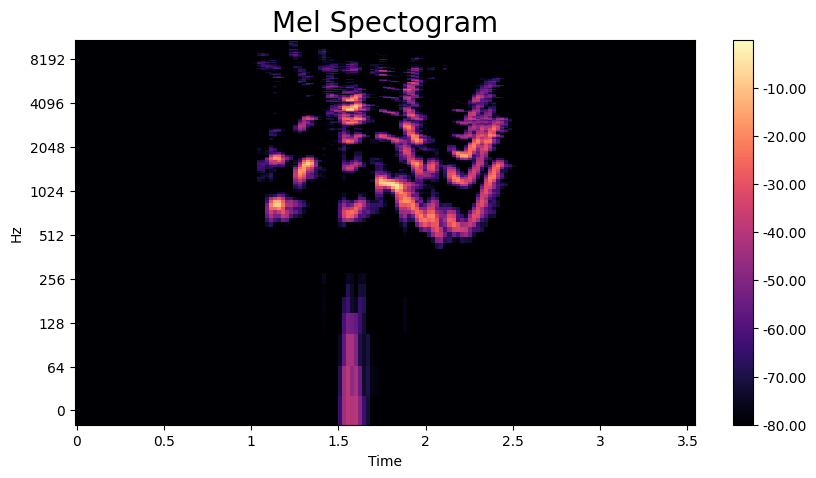

In [46]:
#plot transformed audio data
fig, ax = plt.subplots(figsize = (10,5))
img = librosa.display.specshow(Sound_in_Decibal_mel,
                              x_axis = "time",
                              y_axis = "log",
                              ax = ax)
ax.set_title("Mel Spectogram", fontsize = 20)
fig.colorbar(img, ax=ax, format = f'%0.2f')
plt.show()

In [47]:
Sound_in_Decibal_mel

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)